In [1]:
#import Libraries

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st
pd.set_option('display.max_columns', None)

import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import missingno as msno

from sklearn.preprocessing import StandardScaler
from scipy import stats


In [3]:
#read csv

In [4]:
vg_sales = pd.read_csv('/home/killerivy/Desktop/anacondaproj/VG_sales/vgsales.csv')

In [5]:
'''
Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

'''

"\nRank - Ranking of overall sales\n\nName - The games name\n\nPlatform - Platform of the games release (i.e. PC,PS4, etc.)\n\nYear - Year of the game's release\n\nGenre - Genre of the game\n\nPublisher - Publisher of the game\n\nNA_Sales - Sales in North America (in millions)\n\nEU_Sales - Sales in Europe (in millions)\n\nJP_Sales - Sales in Japan (in millions)\n\nOther_Sales - Sales in the rest of the world (in millions)\n\nGlobal_Sales - Total worldwide sales.\n\n"

In [6]:
vg_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
vg_sales.shape

(16598, 11)

In [8]:
vg_sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [9]:
vg_sales.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [10]:
'''as the data dows not have many missing values, me can drop them'''

'as the data dows not have many missing values, me can drop them'

In [11]:
vg_sales = vg_sales.dropna()

In [12]:
vg_sales.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [13]:
'''To do furthuer analysis and visualisation of data we will make a copy'''
vg_sales_copy = vg_sales.copy()

## 1. What genre of games have been made the most

In [14]:
#method1
count = vg_sales_copy['Genre'].value_counts()
count

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

In [15]:
#method2
vg_sales_copy.groupby('Genre').size()

Genre
Action          3251
Adventure       1274
Fighting         836
Misc            1686
Platform         875
Puzzle           570
Racing          1225
Role-Playing    1470
Shooter         1282
Simulation       848
Sports          2304
Strategy         670
dtype: int64

In [16]:
#visualise the data

In [17]:
count = count[:,]

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 8 Text yticklabel objects>)

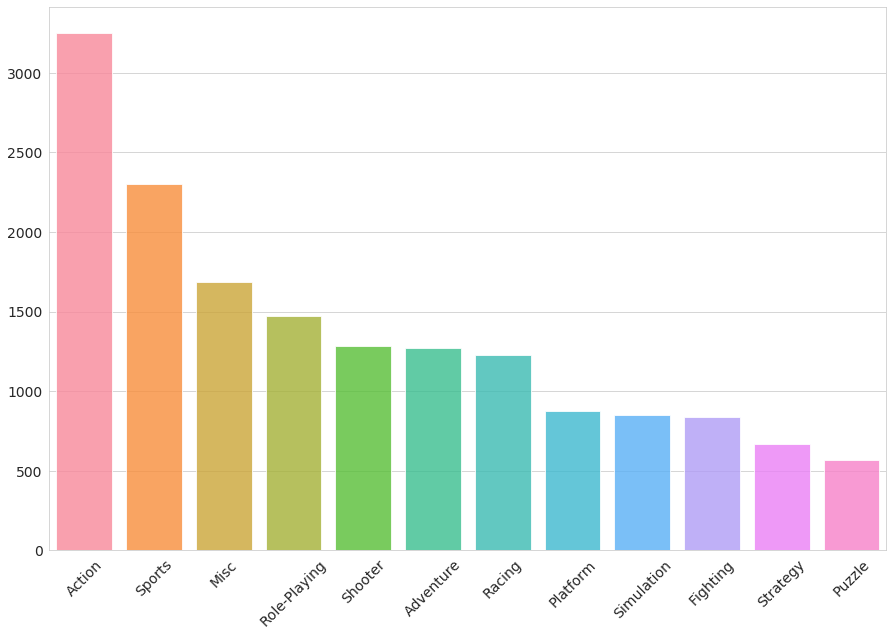

In [18]:
plt.figure(figsize=(15,10))
sns.barplot(count.index,count.values,alpha = 0.8,saturation = 1)
plt.xticks(fontsize=14,rotation = 45)
plt.yticks(fontsize=14)


In [19]:
plt.style.available

['seaborn-colorblind',
 'seaborn-ticks',
 'fivethirtyeight',
 'dark_background',
 'seaborn-muted',
 '_classic_test',
 'seaborn-dark-palette',
 'classic',
 'ggplot',
 'grayscale',
 'seaborn-poster',
 'seaborn-darkgrid',
 'seaborn-notebook',
 'fast',
 'seaborn-dark',
 'seaborn-whitegrid',
 'seaborn-deep',
 'seaborn-pastel',
 'seaborn-talk',
 'tableau-colorblind10',
 'seaborn-white',
 'seaborn-bright',
 'seaborn',
 'seaborn-paper',
 'bmh',
 'Solarize_Light2']

##  2.Which year has the greatest releases

In [20]:
count_year = vg_sales_copy['Year'].value_counts().sort_values(ascending = False).reset_index()
count_year

,index,Year
0,2009.0,1431
1,2008.0,1428
2,2010.0,1257
3,2007.0,1201
4,2011.0,1136
5,2006.0,1008
6,2005.0,936
7,2002.0,829
8,2003.0,775
9,2004.0,744


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 <a list of 9 Text yticklabel objects>)

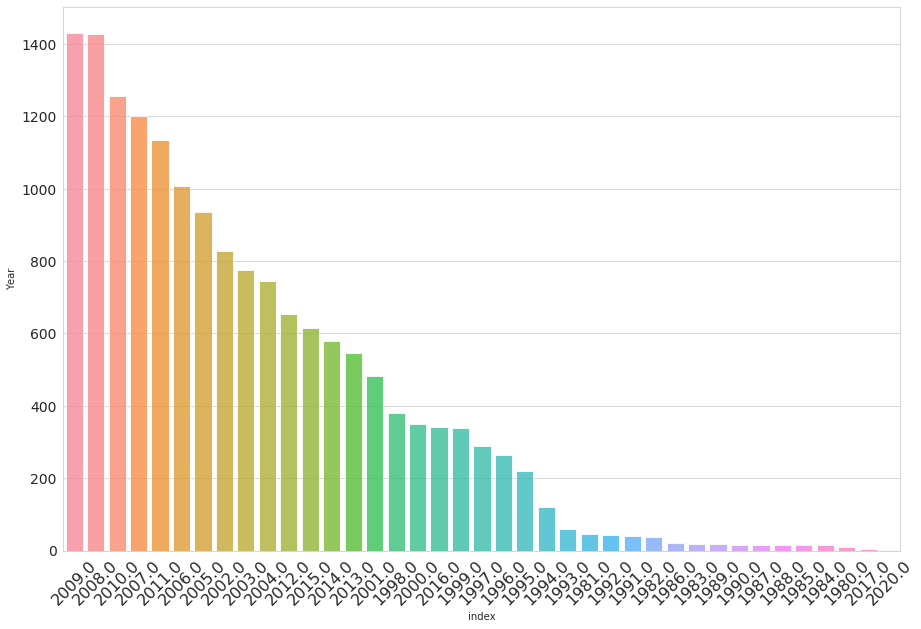

In [21]:
plt.figure(figsize=(15,10))
sns.barplot(count_year['index'],count_year['Year'],alpha = 0.8,saturation = 1,order = count_year['index'])
plt.xticks(fontsize=16,rotation = 45)
plt.yticks(fontsize=14)



## 3. Top 5 release games release by genre

In [22]:
count_3 = vg_sales_copy.groupby(['Year','Genre']).sum()
count_3

Rank  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Year   Genre                                                             
1980.0 Action          5368      0.32      0.02      0.00         0.00   
       Fighting        2671      0.72      0.04      0.00         0.01   
       Misc           16956      2.53      0.15      0.00         0.02   
       Shooter          804      6.56      0.43      0.00         0.08   
       Sports          4027      0.46      0.03      0.00         0.01   
...                     ...       ...       ...       ...          ...   
2016.0 Sports        360626      4.57      7.36      0.78         1.92   
       Strategy      138736      0.11      0.32      0.05         0.04   
2017.0 Action         16441      0.00      0.00      0.01         0.00   
       Role-Playing   30637      0.00      0.00      0.04         0.00   
2020.0 Simulation      5959      0.27      0.00      0.00         0.02   

                     Global_Sales  
Year   Genre                       
1980.0 Action                0.34  
       Fighting              0.77  
       Misc                  2.71  
       Shooter               7.07  
       Sports                0.49  
...                           ...  
2016.0 Sports               14.60  
       Strategy              0.50  
2017.0 Action                0.01  
       Role-Playing          0.04  
2020.0 Simulation            0.29  

[389 rows x 6 columns]

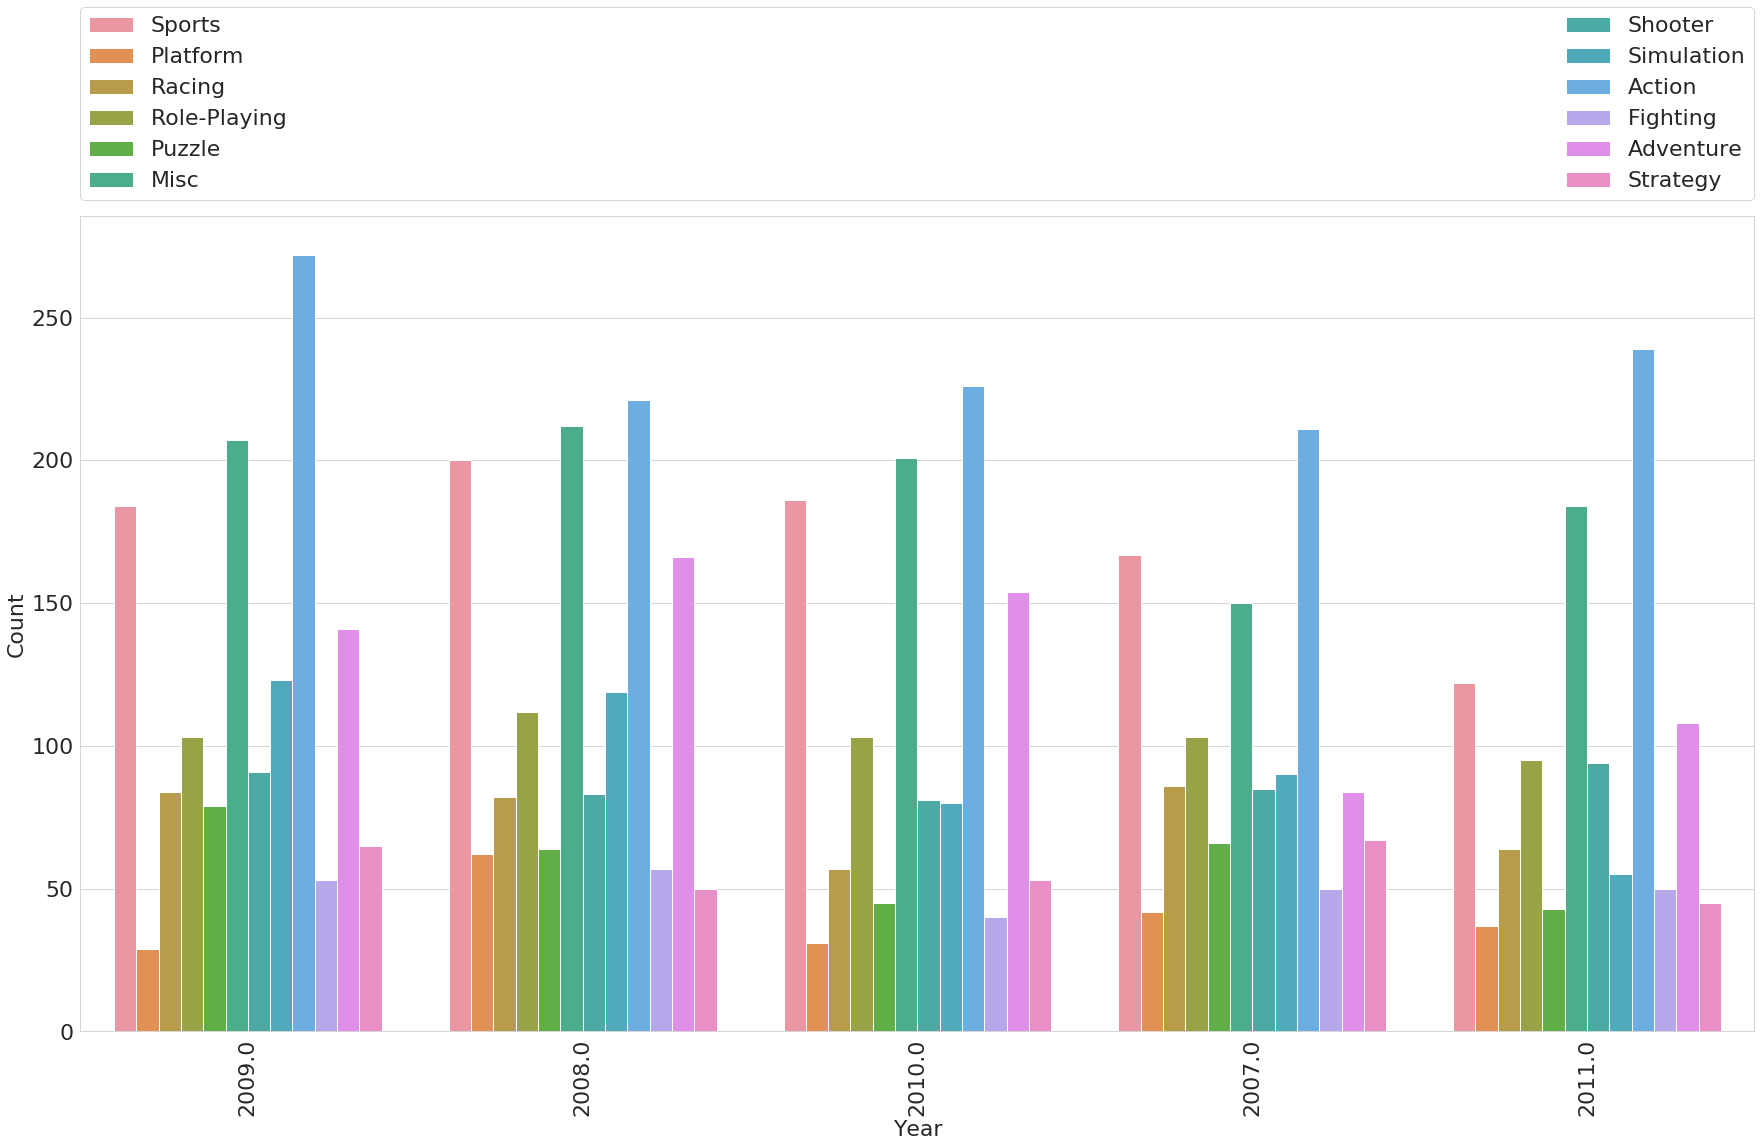

In [23]:
plt.figure(figsize=(30, 15))
sns.countplot(x= vg_sales_copy.Year, data = vg_sales_copy, hue= vg_sales_copy.Genre, order = vg_sales_copy.Year.value_counts().iloc[:5].index)
plt.xticks(size=22, rotation=90)
plt.yticks(size=22)
plt.ylabel('Count',fontsize = 22)
plt.xlabel('Year',fontsize = 22)
plt.legend(fontsize = 22,bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

## 4. Which year had the highest sales worldwide?

In [24]:
vg_sales_copy

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [25]:
Globals= vg_sales_copy.groupby(['Year'])['Global_Sales'].sum().reset_index()

In [26]:
Globals.head()

,Year,Global_Sales
0,1980.0,11.38
1,1981.0,35.77
2,1982.0,28.86
3,1983.0,16.79
4,1984.0,50.36


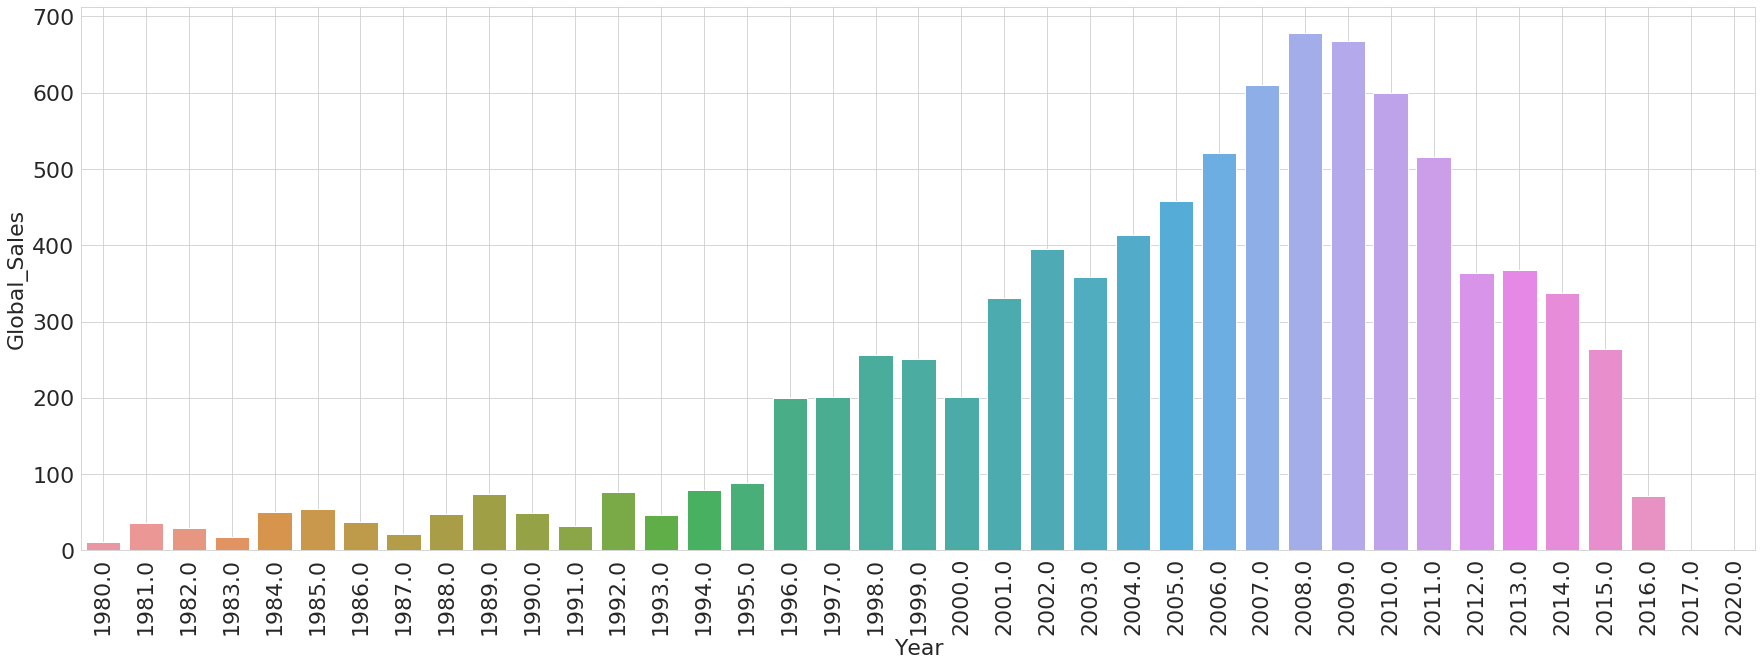

In [27]:
plt.figure(figsize=(30,10))
sns.barplot(x = 'Year',y = 'Global_Sales', data = Globals)
plt.xticks(fontsize = 22, rotation = 90)
plt.yticks(fontsize = 22)
plt.xlabel('Year',fontsize= 22)
plt.ylabel('Global_Sales',fontsize= 22)
plt.grid(True)

### 5. Which genre game has been released the most in a single year?

In [28]:
year_max_df = vg_sales_copy.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last').reset_index(drop=True)
# year_max_genre

In [29]:
genre = year_max_genre['Genre'].values
# genre[0]

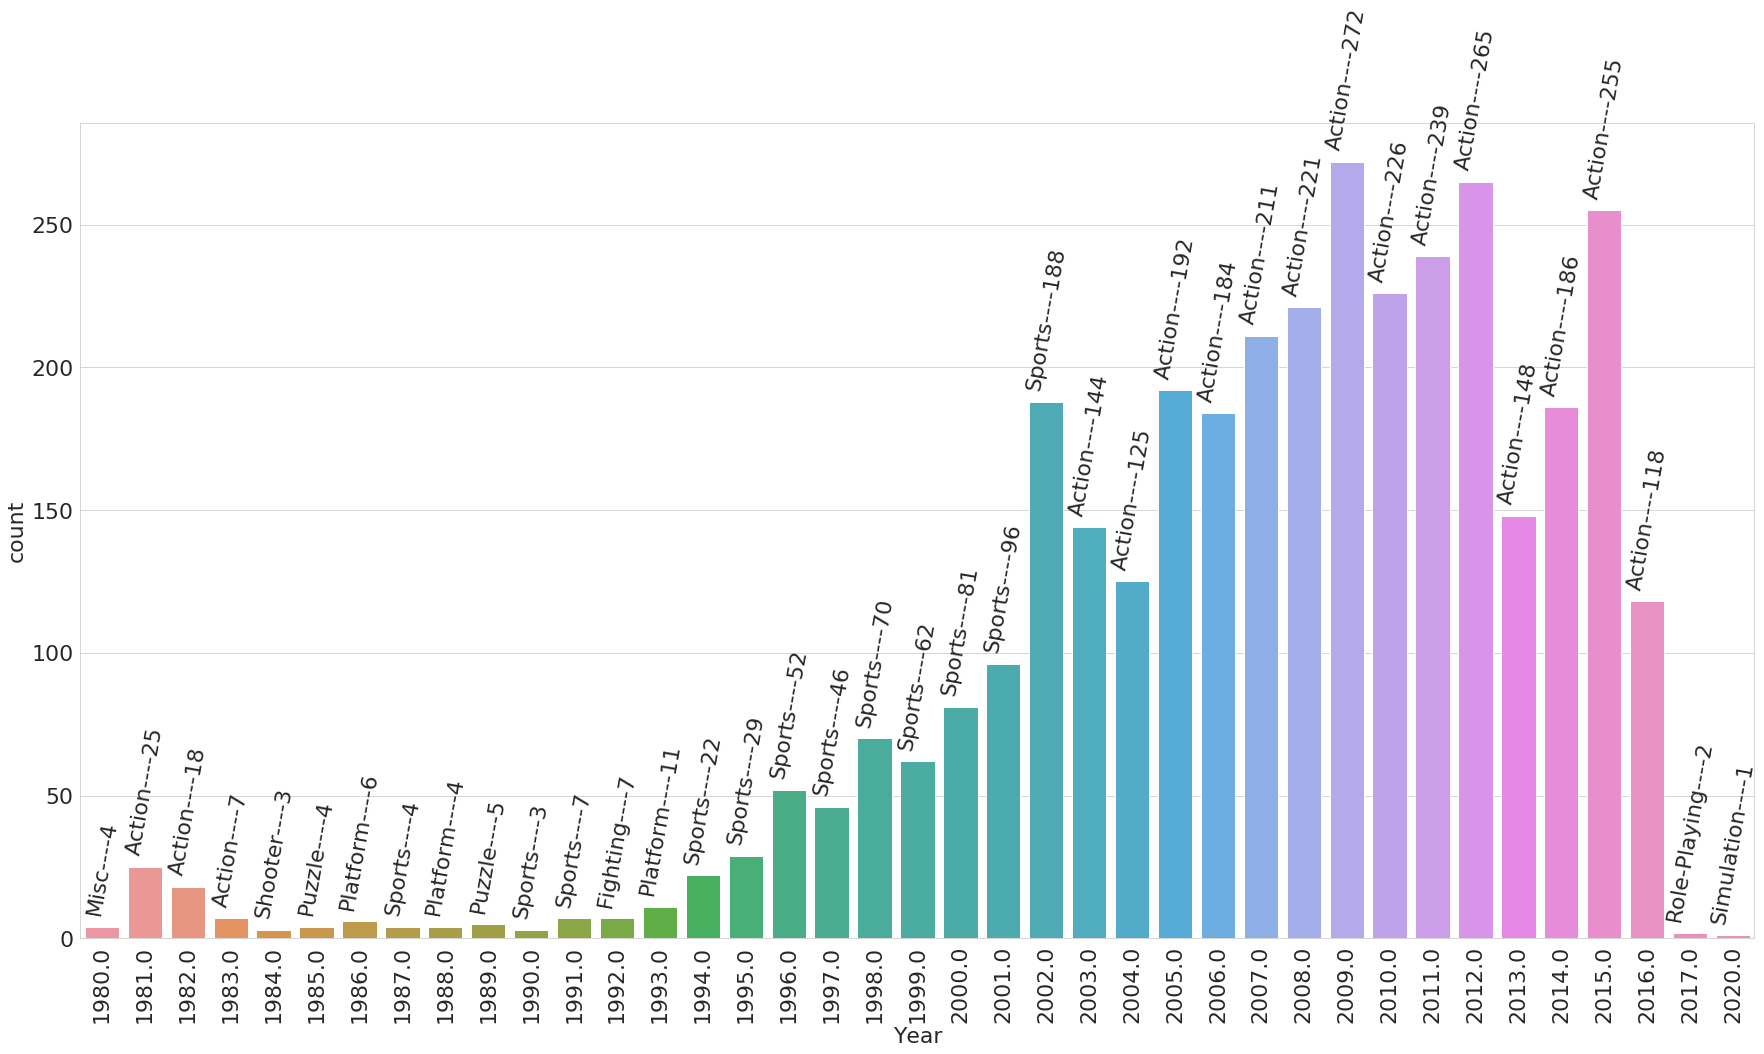

In [30]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='count', data=year_max_genre)
index = 0
for value in year_max_genre['count'].values:
#     print(asd)
    g.text(index, value + 5, str(genre[index] + '----' +str(value)), size=22, rotation= 80, ha="center")
    index += 1



plt.xticks(fontsize = 22, rotation = 90)
plt.yticks(fontsize = 22)
plt.xlabel('Year',fontsize= 22)
plt.ylabel('count',fontsize= 22)
plt.show()

### 6. Which genre game has sold the most in a single year?

In [31]:
year_max = vg_sales_copy.groupby(['Year', 'Genre'])['Global_Sales'].size().reset_index()
year_max_sale = year_max.groupby(['Year'])['Global_Sales'].transform(max) == year_max['Global_Sales']
year_max_genre_sale = year_max[year_max_sale].reset_index(drop=True)
year_max_genre_sale = year_max_genre_sale.drop_duplicates(subset=["Year", "Global_Sales"], keep='last').reset_index(drop=True)
# year_max_genre

In [32]:
genre = year_max_genre_sale['Genre']

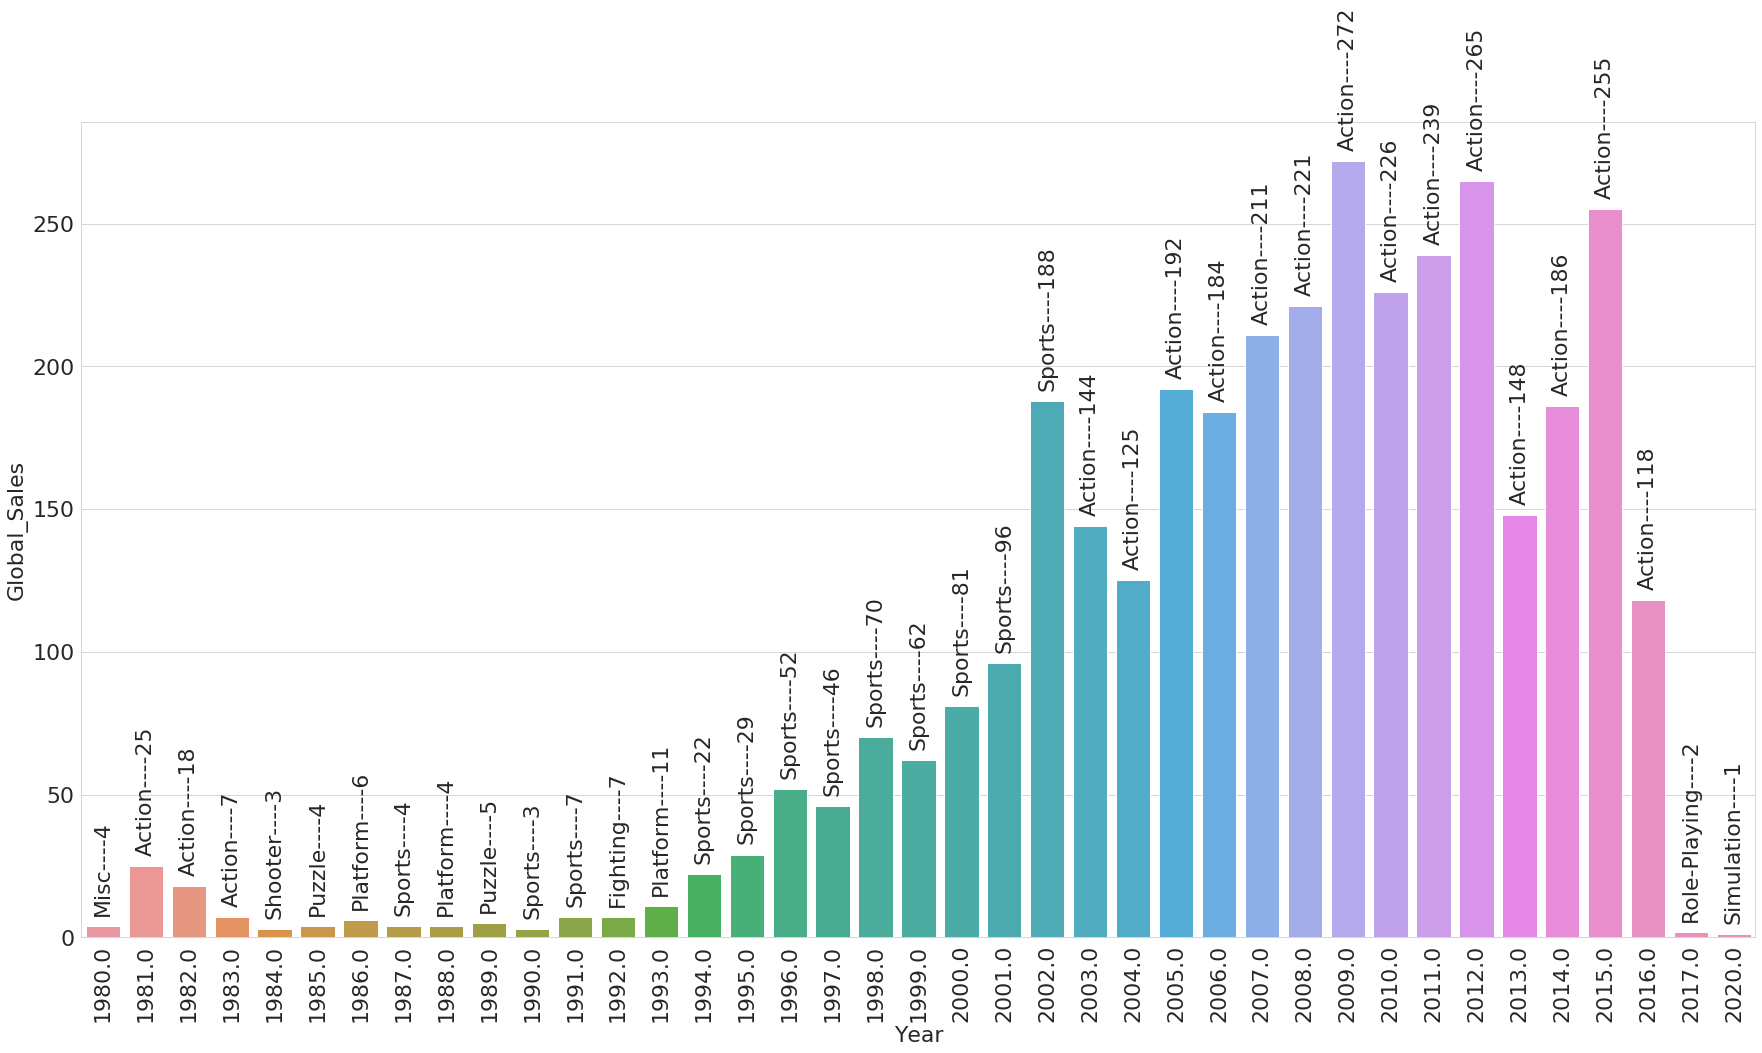

In [33]:
plt.figure(figsize=(30,15))
g = sns.barplot(x = 'Year', y = 'Global_Sales', data = year_max_genre_sale)
index = 0
for value in year_max_genre_sale['Global_Sales']:
    g.text(index,value+5,str(genre[index]+'----'+str(round(value,2))),size = 22, rotation = 90 , ha = 'center' )
    index += 1
plt.xticks(fontsize = 22, rotation = 90)
plt.yticks(fontsize = 22)
plt.xlabel('Year',fontsize= 22)
plt.ylabel('Global_Sales',fontsize= 22)
plt.show()

### 7. Which genre have the highest sale price globally?

In [34]:
x = vg_sales_copy.groupby(['Genre'])['Global_Sales'].sum().reset_index().sort_values(by = 'Global_Sales',ascending = False)

In [35]:
x

,Genre,Global_Sales
0,Action,1722.84
10,Sports,1309.24
8,Shooter,1026.20
7,Role-Playing,923.83
4,Platform,829.13
3,Misc,789.87
6,Racing,726.76
2,Fighting,444.05
9,Simulation,389.98
5,Puzzle,242.21


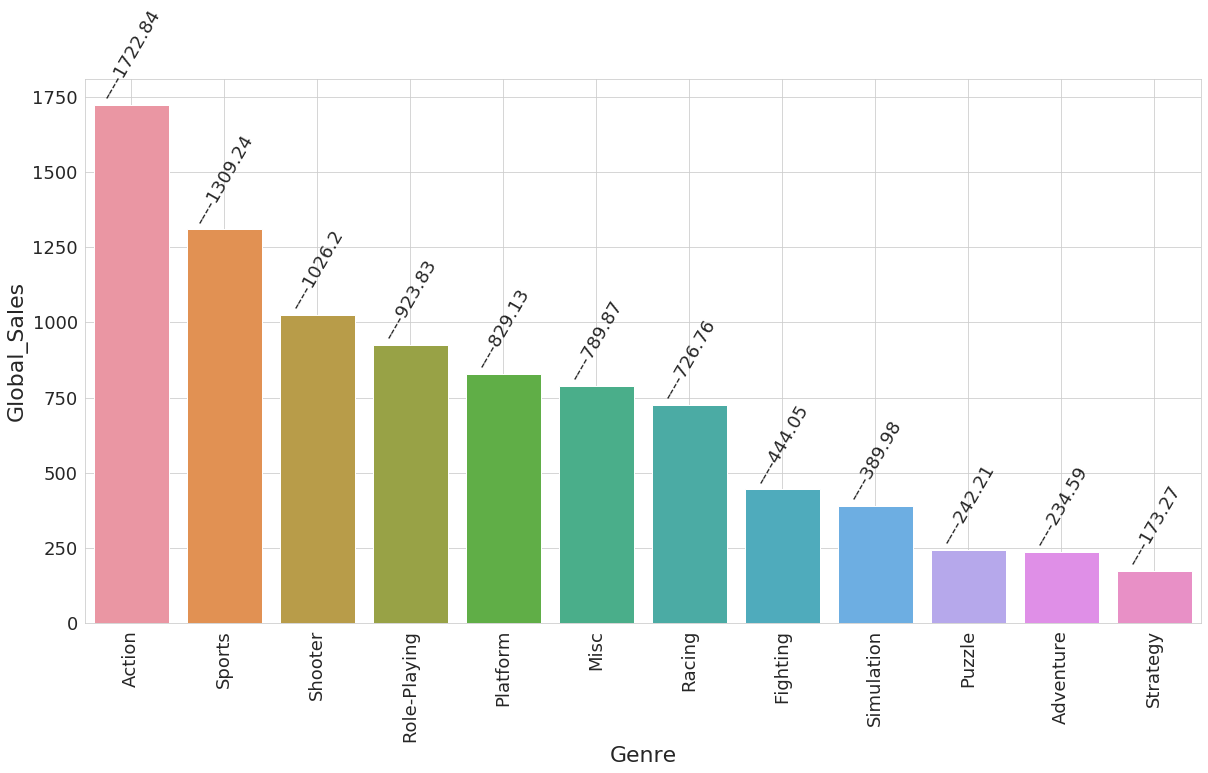

In [36]:
plt.figure(figsize=(20,10))
g = sns.barplot(x = 'Genre',y = 'Global_Sales', data = x)
plt.xticks(fontsize = 18, rotation = 90)
plt.yticks(fontsize = 18)
plt.xlabel('Genre',fontsize= 22)
plt.ylabel('Global_Sales',fontsize= 22)
index = 0
for value in x['Global_Sales']:
    g.text(index,value+20,str('----'+str(round(value,2))), size = 18, rotation = 60, ha = 'center' )
    index += 1
plt.grid(True)

### 8. Which platform has the highest sales price globally?

In [37]:
y = vg_sales_copy.groupby(['Platform'])['Global_Sales'].sum().reset_index().sort_values(by = 'Global_Sales',ascending = False)
y

,Platform,Global_Sales
16,PS2,1233.46
28,X360,969.60
17,PS3,949.35
26,Wii,909.81
4,DS,818.91
15,PS,727.39
6,GBA,305.62
19,PSP,291.71
18,PS4,278.10
13,PC,254.70


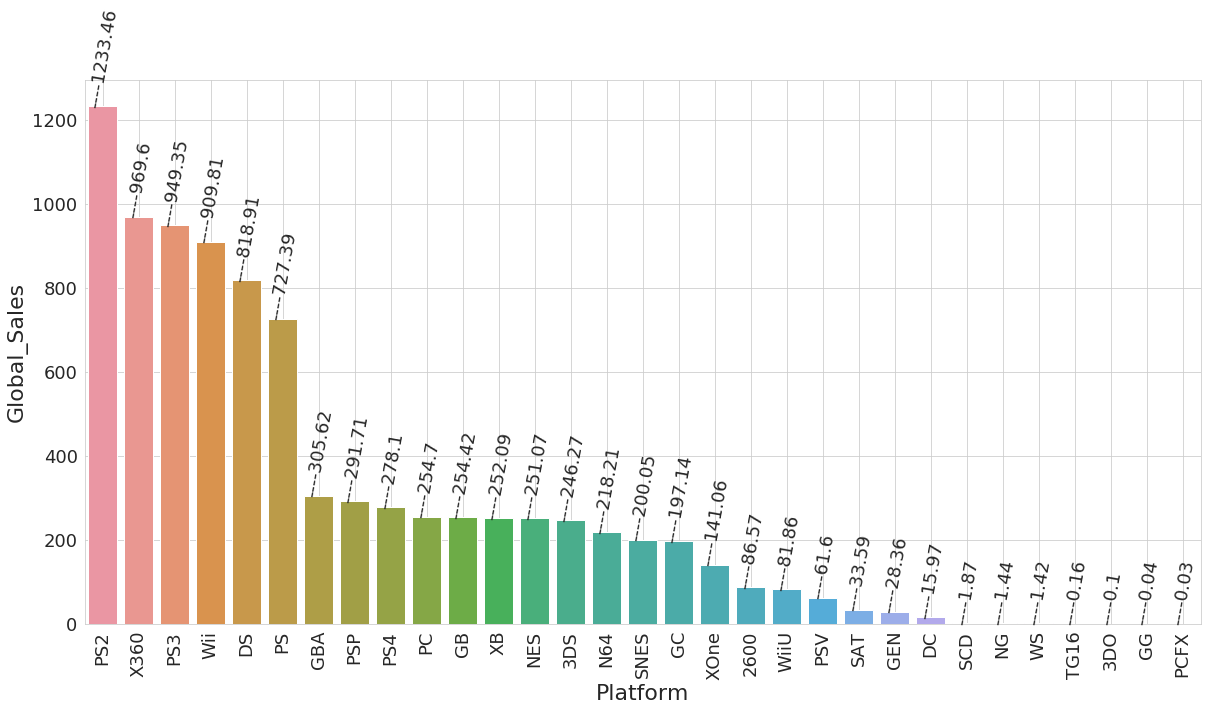

In [38]:
plt.figure(figsize=(20,10))
g = sns.barplot(x = 'Platform',y = 'Global_Sales', data = y)
plt.xticks(fontsize = 18, rotation = 90)
plt.yticks(fontsize = 18)
plt.xlabel('Platform',fontsize= 22)
plt.ylabel('Global_Sales',fontsize= 22)
index = 0
for value in y['Global_Sales']:
    g.text(index,value+2,str('----'+str(round(value,2))), size = 18, rotation = 80, ha = 'center' )
    index += 1
plt.grid(True)

###  9. Which individual game have the highest sale price globally?

In [39]:
game_sale = vg_sales_copy.sort_values(by = 'Global_Sales',ascending = False).nlargest(20,'Global_Sales')
game_sale

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


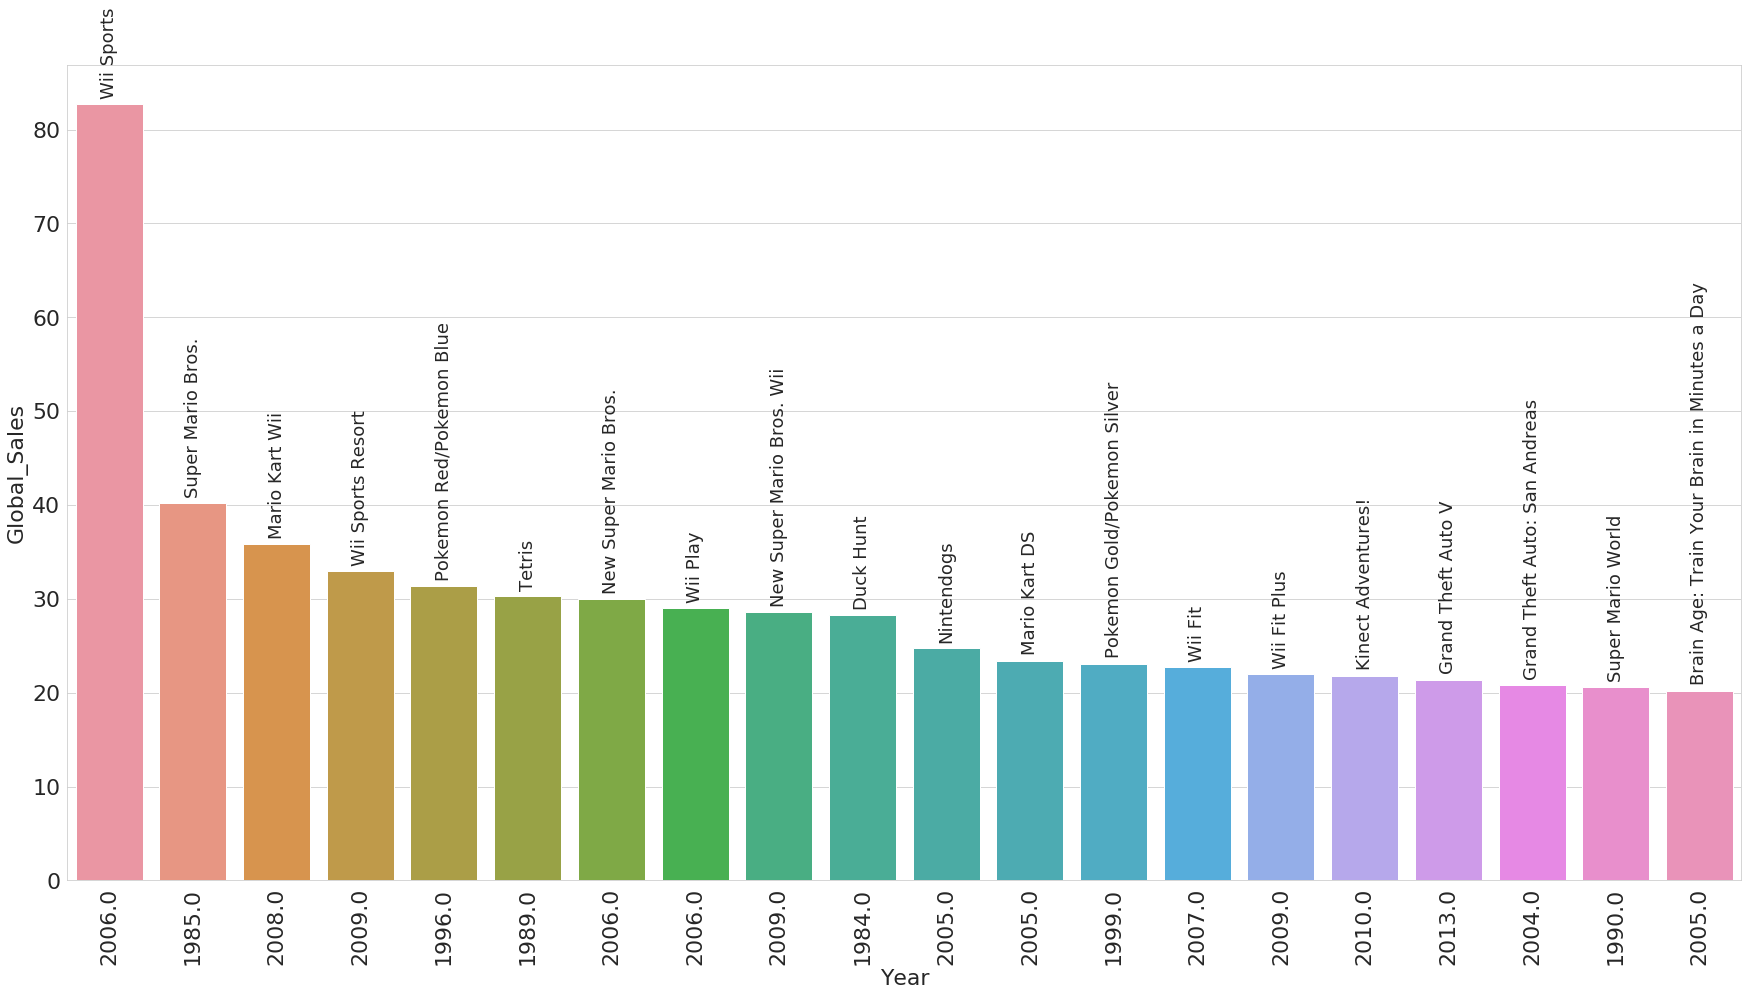

In [40]:
name = game_sale['Name']
plt.figure(figsize=(30,15))
g = sns.barplot(x = 'Name', y = 'Global_Sales', data = game_sale)
index = 0
for value in game_sale['Global_Sales']:
    g.text(index,value+1,str(name[index]),size = 18, rotation = 90 , ha = 'center' )
    index += 1
plt.xticks(np.arange(0,20),game_sale.Year,fontsize = 22, rotation = 90)
plt.yticks(fontsize = 22)
plt.xlabel('Year',fontsize= 22)
plt.ylabel('Global_Sales',fontsize= 22)
plt.show()

### 10.Sales compearison by genre

In [41]:
comp_genre = vg_sales_copy[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

In [42]:
comp_map = comp_genre.groupby(by =['Genre']).sum()

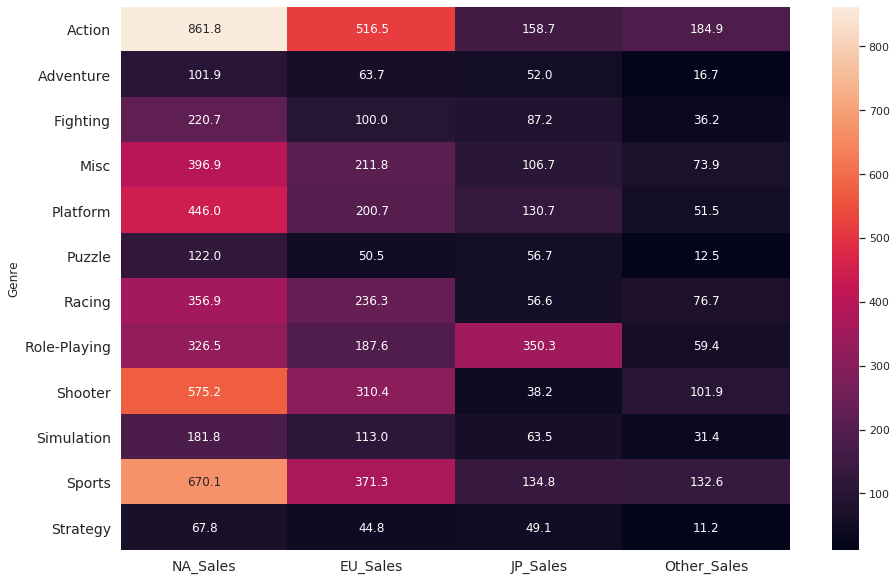

In [43]:
plt.figure(figsize = (15,10))
sns.set(font_scale = 1)
sns.heatmap(comp_map,annot = True , fmt = '.1f')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [44]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table,id_vars=['Genre'], value_vars=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],var_name='Sale_Area',value_name='Sale_Price')
comp_table

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,861.77
1,Adventure,NA_Sales,101.93
2,Fighting,NA_Sales,220.74
3,Misc,NA_Sales,396.92
4,Platform,NA_Sales,445.99
5,Puzzle,NA_Sales,122.01
6,Racing,NA_Sales,356.93
7,Role-Playing,NA_Sales,326.50
8,Shooter,NA_Sales,575.16
9,Simulation,NA_Sales,181.78


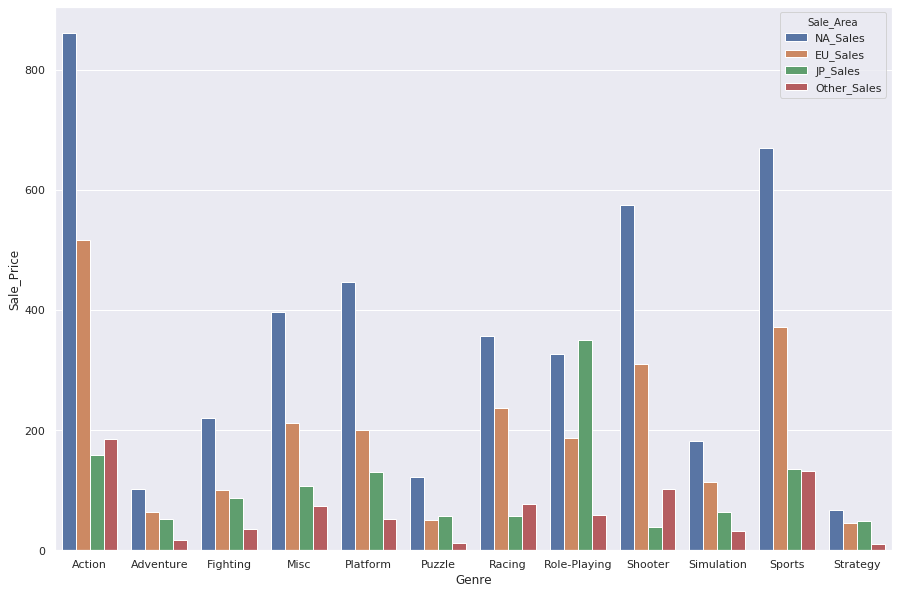

In [45]:
plt.figure(figsize = (15,10))
sns.barplot(x = 'Genre', y = 'Sale_Price', hue = 'Sale_Area',data = comp_table)

### 11. Comparisoin of Sales by platform

In [46]:
comp_platform = vg_sales_copy[['Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

In [47]:
comp_platform = comp_platform.groupby(by = ['Platform']).sum()

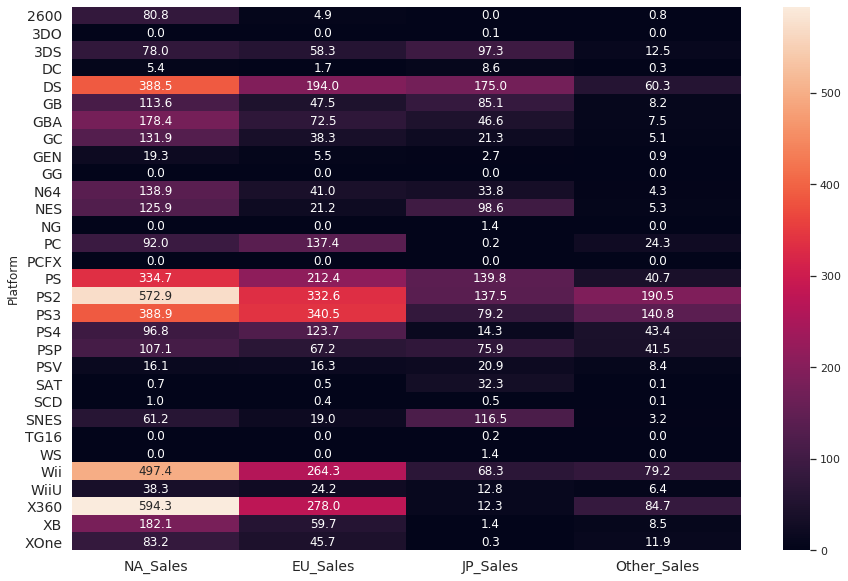

In [48]:
plt.figure(figsize = (15,10))
sns.set(font_scale = 1)
sns.heatmap(comp_platform,annot = True , fmt = '.1f')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [49]:
comp_platform_table = comp_platform.reset_index()
comp_platform_table = pd.melt(comp_platform_table,id_vars=['Platform'], value_vars=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],var_name='Sale_Area',value_name='Sale_Price')
comp_platform_table

,Platform,Sale_Area,Sale_Price
0,2600,NA_Sales,80.78
1,3DO,NA_Sales,0.00
2,3DS,NA_Sales,78.03
3,DC,NA_Sales,5.43
4,DS,NA_Sales,388.53
...,...,...,...
119,Wii,Other_Sales,79.20
120,WiiU,Other_Sales,6.45
121,X360,Other_Sales,84.67
122,XB,Other_Sales,8.48


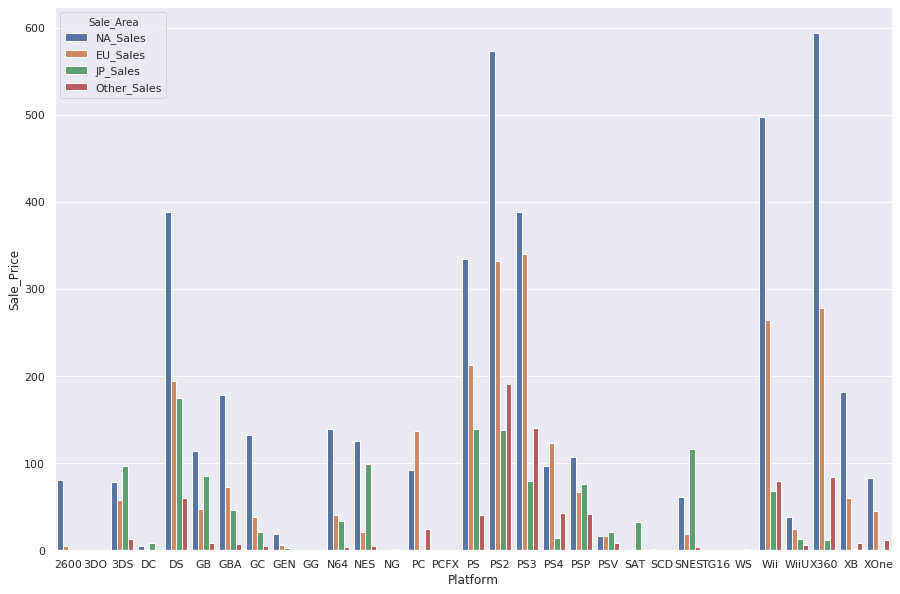

In [50]:
plt.figure(figsize = (15,10))
sns.barplot(x = 'Platform', y = 'Sale_Price', hue = 'Sale_Area',data = comp_platform_table)

### 12. Top 20 Publisher

In [51]:
vg_sales_copy.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [52]:
top_publisher = vg_sales_copy.groupby(['Publisher'])['Year'].count().sort_values(ascending = False).head(20)

In [53]:
top_publisher1 = pd.DataFrame(top_publisher).reset_index()
top_publisher1

,Publisher,Year
0,Electronic Arts,1339
1,Activision,966
2,Namco Bandai Games,928
3,Ubisoft,918
4,Konami Digital Entertainment,823
5,THQ,712
6,Nintendo,696
7,Sony Computer Entertainment,682
8,Sega,632
9,Take-Two Interactive,412


Text(0, 0.5, 'Count')

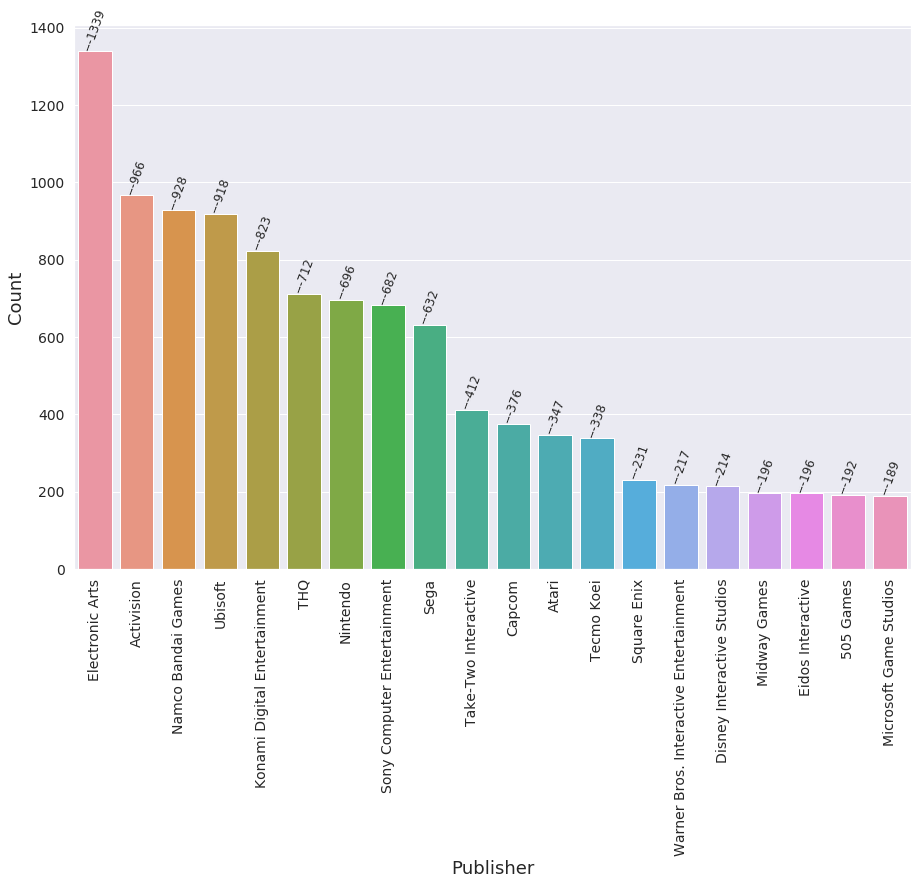

In [54]:
plt.figure(figsize = (15,10))
g = sns.countplot(x="Publisher",data = vg_sales_copy ,order = vg_sales_copy.groupby(['Publisher'])['Year'].count().sort_values(ascending = False).head(20).index)
index = 0
for value in top_publisher1['Year']:
    g.text(index,value+5,"---"+str(value),size = 12,rotation = 70,ha = 'center')
    index+=1
plt.xticks(fontsize = 14, rotation = 90)
plt.yticks(fontsize = 14)
plt.xlabel('Publisher',fontsize= 18)
plt.ylabel('Count',fontsize= 18)

### 12. Global sales of top publishers

In [55]:
sales_publisher = vg_sales_copy[['Global_Sales','Publisher']]
sales_publisher.head()

,Global_Sales,Publisher
0,82.74,Nintendo
1,40.24,Nintendo
2,35.82,Nintendo
3,33.00,Nintendo
4,31.37,Nintendo


In [56]:
salespublisher = sales_publisher.groupby(['Publisher'])['Global_Sales'].sum().sort_values(ascending = False).head(20)
salespublisher = pd.DataFrame(salespublisher).reset_index()
salespublisher

,Publisher,Global_Sales
0,Nintendo,1784.43
1,Electronic Arts,1093.39
2,Activision,721.41
3,Sony Computer Entertainment,607.28
4,Ubisoft,473.54
5,Take-Two Interactive,399.30
6,THQ,340.44
7,Konami Digital Entertainment,278.56
8,Sega,270.70
9,Namco Bandai Games,253.65


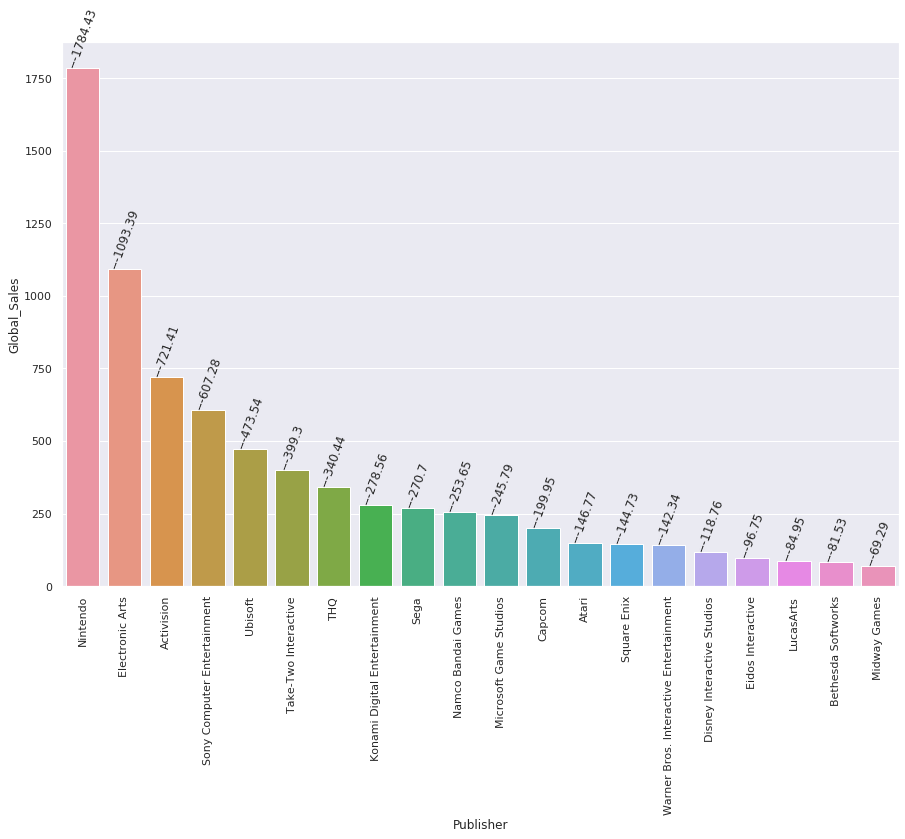

In [57]:
plt.figure(figsize=(15, 10))
g = sns.barplot(x='Publisher', y='Global_Sales', data=salespublisher)
index = 0
for value in salespublisher['Global_Sales']:
    g.text(index,value+5,"---"+str(round(value,2)),size = 12,rotation = 70,ha = 'center')
    index+=1
plt.xticks(rotation=90)
plt.show()

### 13. Comparision of publishers by Sales

In [58]:
comp_publisher = vg_sales_copy[['Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
comp_publisher.head()

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Nintendo,11.27,8.89,10.22,1.00,31.37


In [59]:
comp_publisher1 = comp_publisher.groupby(['Publisher']).sum().reset_index().sort_values(by = 'Global_Sales', ascending = False).head(20)
comp_publisher1

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
359,Nintendo,815.75,418.30,454.99,95.19,1784.43
138,Electronic Arts,584.22,367.38,13.98,127.63,1093.39
21,Activision,426.01,213.72,6.54,74.79,721.41
455,Sony Computer Entertainment,265.22,187.55,74.10,80.40,607.28
524,Ubisoft,252.81,163.03,7.33,50.16,473.54
493,Take-Two Interactive,220.47,117.95,5.83,55.20,399.30
487,THQ,208.60,94.60,5.01,32.11,340.44
275,Konami Digital Entertainment,88.91,68.62,90.93,29.91,278.56
445,Sega,108.78,81.41,56.19,24.30,270.70
347,Namco Bandai Games,69.38,42.61,126.84,14.64,253.65


In [60]:
comp_publisher = pd.melt(comp_publisher1, id_vars=['Publisher'],
                         value_vars=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],
                         value_name='Sales_price',
                         var_name='Sales_Area')
comp_publisher

,Publisher,Sales_Area,Sales_price
0,Nintendo,NA_Sales,815.75
1,Electronic Arts,NA_Sales,584.22
2,Activision,NA_Sales,426.01
3,Sony Computer Entertainment,NA_Sales,265.22
4,Ubisoft,NA_Sales,252.81
...,...,...,...
75,Disney Interactive Studios,Other_Sales,13.15
76,Eidos Interactive,Other_Sales,7.90
77,LucasArts,Other_Sales,10.28
78,Bethesda Softworks,Other_Sales,10.10


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

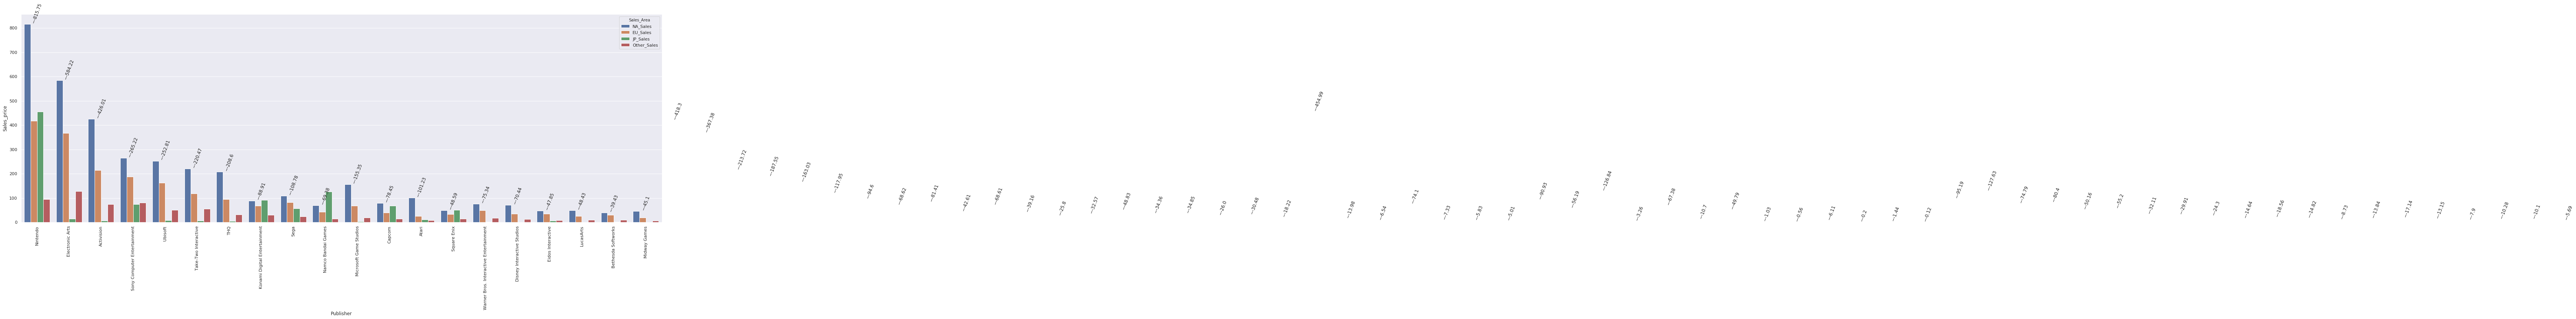

In [61]:
plt.figure(figsize = (30,10))
g = sns.barplot(x = 'Publisher', y = 'Sales_price', hue = 'Sales_Area', data = comp_publisher)
index = 0
for value in comp_publisher['Sales_price']:
    g.text(index,value+5,"---"+str(round(value,2)),size = 12,rotation = 70,ha = 'center')
    index+=1
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

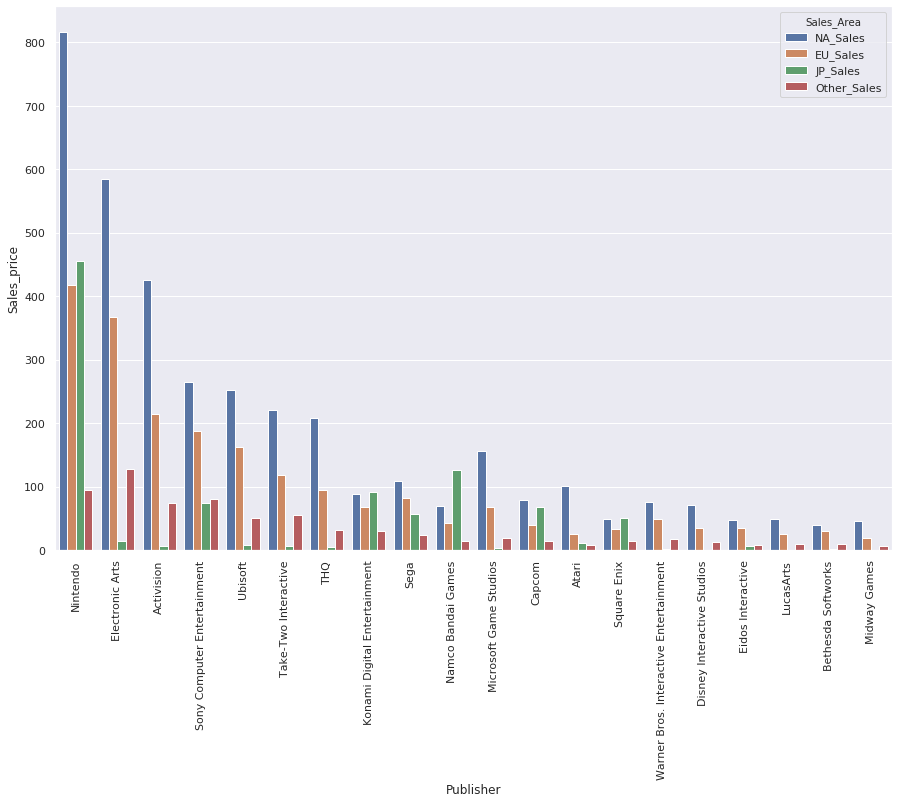

In [83]:
plt.figure(figsize = (15,10))
g = sns.barplot(x = 'Publisher', y = 'Sales_price', hue = 'Sales_Area', data = comp_publisher)

plt.xticks(rotation = 90)

### 15 Top publisher each year

In [85]:
top_publisher_year = vg_sales_copy[['Publisher','Year']]
top_publisher_year = top_publisher_year.groupby(['Year','Publisher']).size().reset_index(name = 'Count')

In [86]:
top_publisher_year.head()

,Year,Publisher,Count
0,1980.0,Activision,5
1,1980.0,Atari,4
2,1981.0,20th Century Fox Video Games,3
3,1981.0,Activision,6
4,1981.0,Atari,11


In [87]:
top_publisher_year_idx = top_publisher_year.groupby(['Year'])['Count'].transform(max) == top_publisher_year['Count']
top_publisher_year_count = top_publisher_year[top_publisher_year_idx].reset_index(drop = True)
top_publisher_year_count = top_publisher_year_count.drop_duplicates(subset = ['Year','Count'],keep ='last').reset_index(drop =True)

In [88]:
top_publisher_year_count

,Year,Publisher,Count
0,1980.0,Activision,5
1,1981.0,Atari,11
2,1982.0,Atari,14
3,1983.0,Nintendo,6
4,1984.0,Nintendo,9
5,1985.0,Nintendo,7
6,1986.0,Nintendo,6
7,1987.0,Nintendo,4
8,1988.0,Nintendo,6
9,1989.0,Nintendo,9


In [91]:
publisher= top_publisher_year_count['Publisher']

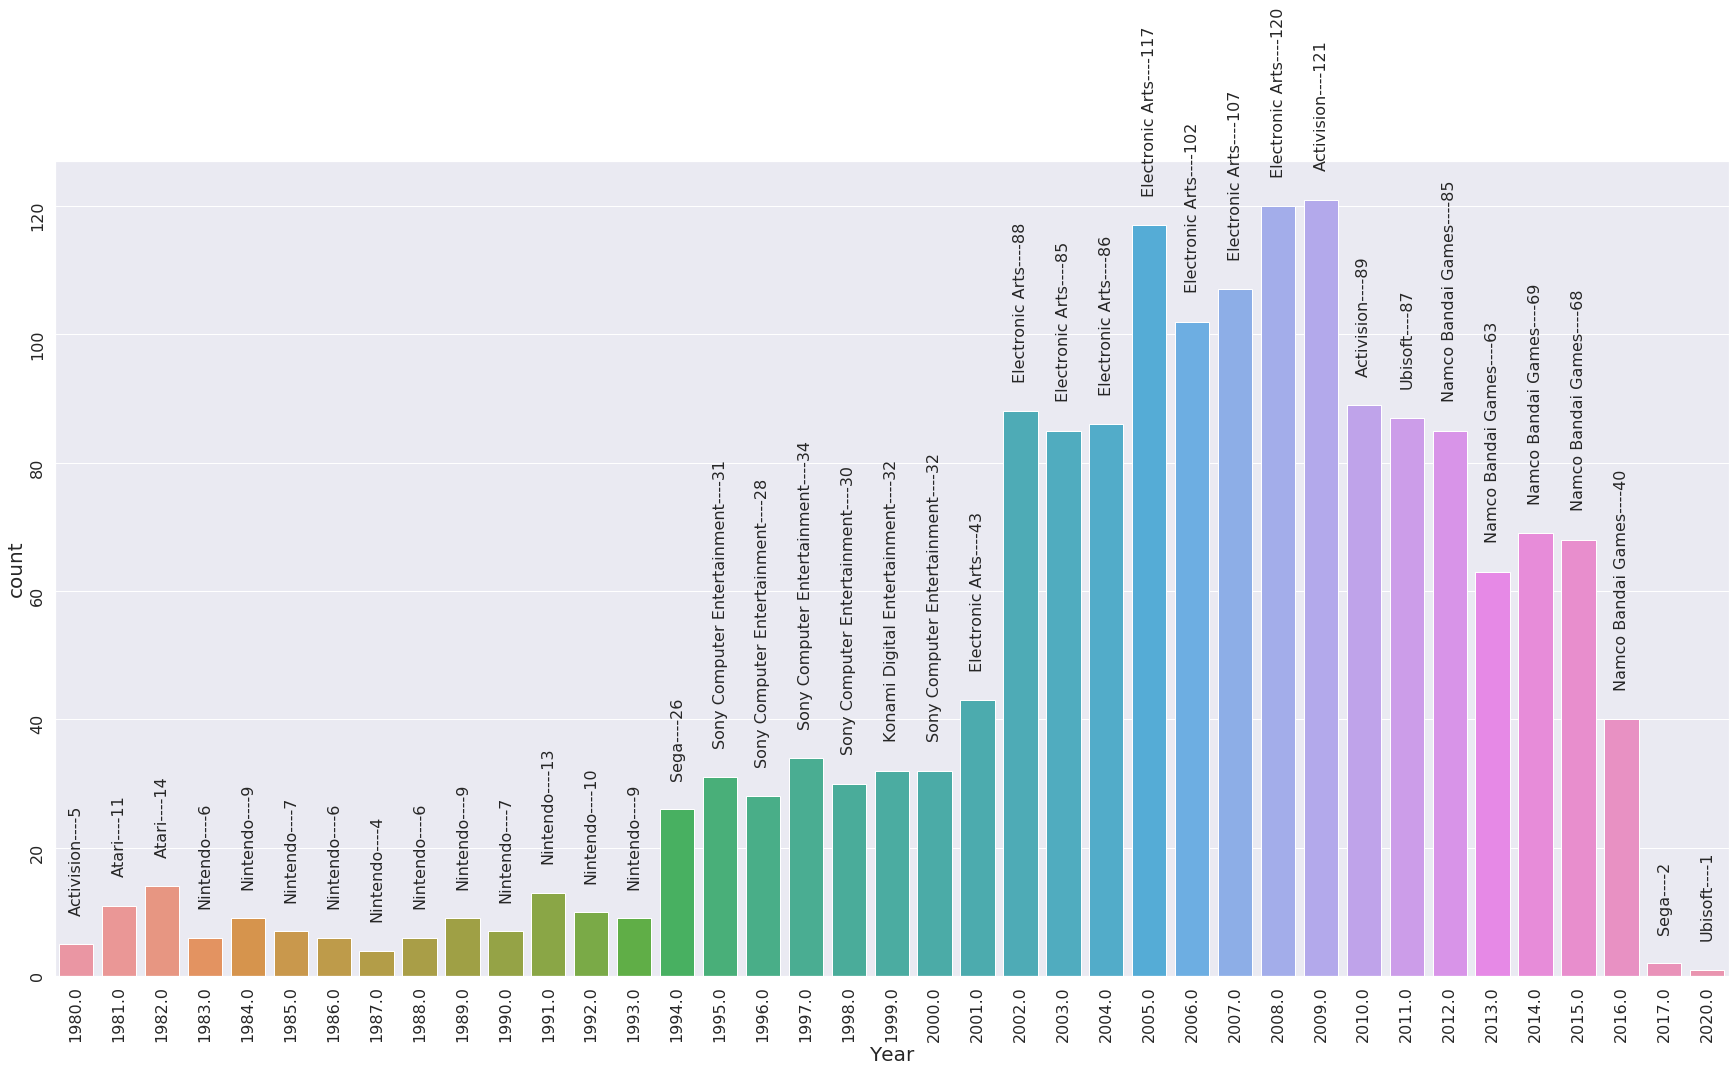

In [101]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='Count', data=top_publisher_year_count)
index = 0
for value in top_publisher_year_count['Count'].values:
#     print(asd)
    g.text(index, value + 5, str(publisher[index] + '----' +str(value)), size=16, rotation= 90, ha="center")
    index += 1

plt.ylabel('count',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.yticks(fontsize=16,rotation=90)
plt.xticks(fontsize=16,rotation=90)
plt.show()

### 16. Total revenue by region

In [102]:
total_sale_reg = vg_sales_copy[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
total_sale_reg = total_sale_reg.sum().reset_index()

In [105]:
total_sale_reg = total_sale_reg.rename(columns={'index':'region',0:'sale'})
total_sale_reg

,region,sale
0,NA_Sales,4327.65
1,EU_Sales,2406.69
2,JP_Sales,1284.27
3,Other_Sales,788.91


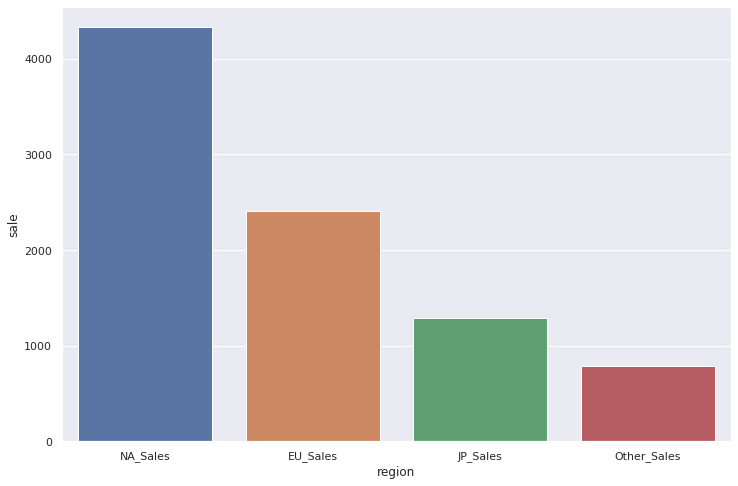

In [110]:
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='sale', data = total_sale_reg, alpha = 1)

In [111]:
labels = total_sale_reg['region']
sizes = total_sale_reg['sale']

([<matplotlib.patches.Wedge at 0x7fd5398ea290>,
 [Text(-1.0995946696115964, 0.029859044890360037, 'NA_Sales'),
  Text(0.7922706574673692, -0.7630905616741847, 'EU_Sales'),
  Text(0.9378314250625531, 0.5748671308790761, 'JP_Sales'),
  Text(0.30547029027007794, 1.056734546497991, 'Other_Sales')],
 [Text(-0.5997789106972343, 0.0162867517583782, '49.1%'),
  Text(0.4321476313458377, -0.4162312154586461, '27.3%'),
  Text(0.5115444136704835, 0.3135638895704051, '14.6%'),
  Text(0.1666201583291334, 0.5764006617261768, '9.0%')])

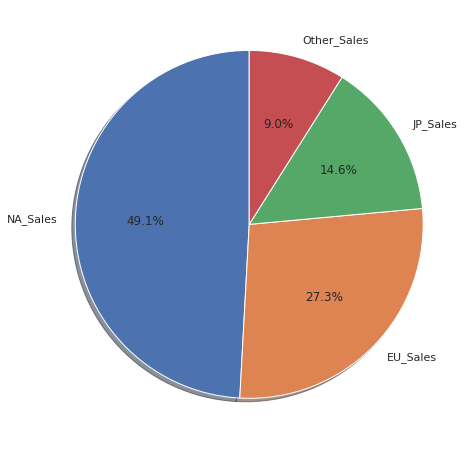

In [112]:
plt.figure(figsize =(10,8))
plt.pie(sizes, labels = labels, autopct='%1.1f%%', shadow = True, startangle =90)

###  correlation heatmap

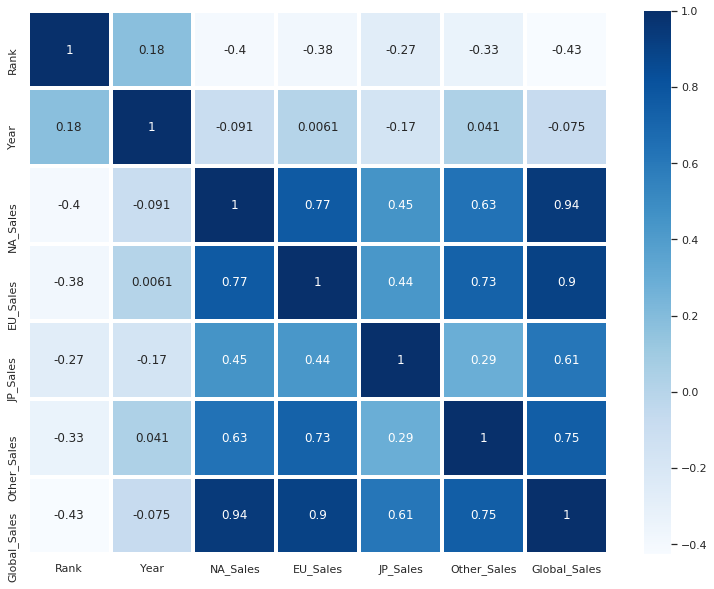

In [113]:
plt.figure(figsize=(13,10))
sns.heatmap(vg_sales_copy.corr(), cmap = "Blues", annot=True, linewidth=3)

##### We can NA_Sales and EU_sales have much effect in Global_Sales. And NA_Sales and EU_sales are mostly corelated